## Multiclass Classification: CIFAR10 small image dataset
https://keras.io/datasets/  
https://www.kaggle.com/c/cifar-10

** Dataset Information: **

Dataset of 50,000 32x32x3 color training images, labeled over 10 categories, and 10,000 test images.

** Attribute Information: **

- 32x32x3 color images
- 10 categories (airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck)

** Objective of this project **

recognizing objects from images

## Data

In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
%matplotlib inline  

Using TensorFlow backend.


In [2]:
# Load Data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

170500096/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


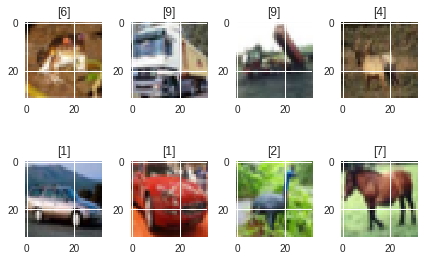

In [3]:
# plot the first 8 images
for i in range(0, 8):
    plt.subplot(240 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);
plt.tight_layout()

In [4]:
# 10 digits
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

## CNN

#### Data Preprocessing

In [5]:
import keras.backend as K
from keras.utils.np_utils import to_categorical
K.set_image_dim_ordering('th')

seed = 101 #random seed for reproducibility
np.random.seed(seed)

# Data preprocessing
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 3, 32, 32) (50000, 10) (10000, 3, 32, 32) (10000, 10)


#### Model Train & Evaluation

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.callbacks import EarlyStopping

np.random.seed(seed)
K.clear_session()
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3, 32, 32), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 13, 13)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 6, 6)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
__________

In [9]:
# callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=100, batch_size=32, verbose=2, callbacks=[early_stop])

# evaluate model on train set
scores = model.evaluate(X_train,y_train,verbose=0)
print('loss of train set: {:0.3f}'.format(scores[0]))
print('accuracy of train set: {:0.1f}%'.format(scores[1]*100))
# evaluate model on test data
scores = model.evaluate(X_test,y_test,verbose=0)
print('loss of test set: {:0.3f}'.format(scores[0]))
print('accuracy of test set: {:0.1f}%'.format(scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 19s - loss: 1.3793 - acc: 0.5093 - val_loss: 1.0272 - val_acc: 0.6398
Epoch 2/100
 - 19s - loss: 0.8876 - acc: 0.6902 - val_loss: 1.0257 - val_acc: 0.6684
Epoch 3/100
 - 19s - loss: 0.7116 - acc: 0.7570 - val_loss: 0.8005 - val_acc: 0.7229
Epoch 4/100
 - 19s - loss: 0.6212 - acc: 0.7903 - val_loss: 0.7946 - val_acc: 0.7553
Epoch 5/100
 - 19s - loss: 0.5784 - acc: 0.8072 - val_loss: 0.8970 - val_acc: 0.7331
Epoch 6/100
 - 19s - loss: 0.5577 - acc: 0.8143 - val_loss: 1.2802 - val_acc: 0.6834
Epoch 7/100
 - 19s - loss: 0.5513 - acc: 0.8196 - val_loss: 0.8352 - val_acc: 0.7552
Epoch 8/100
 - 19s - loss: 0.5518 - acc: 0.8220 - val_loss: 0.9244 - val_acc: 0.7285
Epoch 9/100
 - 19s - loss: 0.5438 - acc: 0.8254 - val_loss: 1.2084 - val_acc: 0.7408
Epoch 10/100
 - 19s - loss: 0.5309 - acc: 0.8310 - val_loss: 1.0899 - val_acc: 0.7008
Epoch 11/100
 - 19s - loss: 0.5278 - acc: 0.8328 - val_loss: 0.9549 - val_acc: 0.7353
Epoch 12/100


Accuracy: 73.2%


             precision    recall  f1-score   support

          0       0.85      0.64      0.73      1000
          1       0.80      0.93      0.86      1000
          2       0.47      0.80      0.59      1000
          3       0.65      0.45      0.53      1000
          4       0.73      0.65      0.69      1000
          5       0.70      0.66      0.68      1000
          6       0.80      0.79      0.80      1000
          7       0.81      0.78      0.80      1000
          8       0.84      0.80      0.82      1000
          9       0.85      0.81      0.83      1000

avg / total       0.75      0.73      0.73     10000



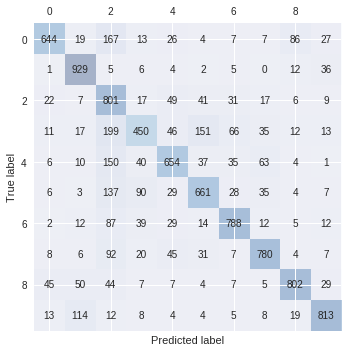

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# predict class with test set
y_pred_test =  model.predict_classes(X_test, batch_size=32, verbose=0)
print('Accuracy: {:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))

#classification report
print('\n')
print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

#confusion matrix
confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()